<a href="https://colab.research.google.com/github/obanlatomiwa/Hamoye-Submissions/blob/master/Hamoye_Stage_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

##warnings.filterwarnings('ignore')
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

In [6]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [7]:
data.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [11]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


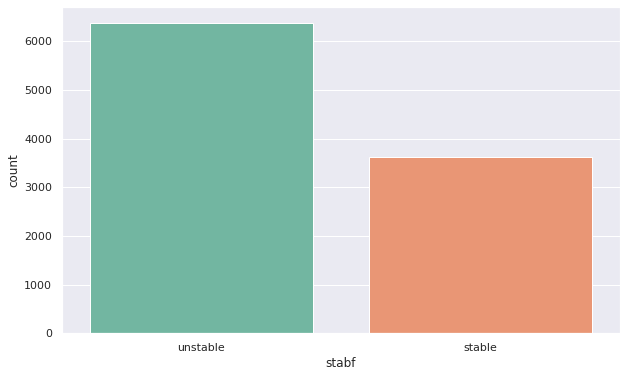

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='stabf', data=data, palette="Set2")

In [13]:
X = data.drop(['stab', 'stabf'], axis=1)
y = data['stabf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
# normalizing data
scaler = StandardScaler()

## TRAIN SET
normalized_train_df = scaler.fit_transform(X_train)
normalized_train_df = pd.DataFrame(normalized_train_df, columns=X_train.columns)

## TEST SET
normalized_test_df = scaler.transform(X_test)
normalized_test_df = pd.DataFrame(normalized_test_df, columns=X_test.columns)

In [15]:
normalized_test_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.593951,-0.412733,1.503924,1.116943,0.403423,-1.492971,-0.785033,1.566781,-0.901007,1.167203,-1.507330,1.084726
1,0.202190,0.374416,-0.188800,-0.522268,-0.225967,-1.058483,0.420047,1.028627,-1.625721,-0.395660,1.414651,1.226011
2,-1.079044,-0.313745,-0.884634,0.017080,-0.943122,0.112653,0.801335,0.733004,1.457108,-1.438495,0.651821,-1.682168
3,-0.083120,-1.107327,0.372805,-1.708152,0.753990,-1.637972,0.403805,-0.088036,0.083322,-1.672322,-0.357714,1.055865
4,0.873921,1.438466,0.086662,1.715037,-0.153880,-0.007015,-0.197053,0.472315,0.136549,-1.469731,0.956396,-0.819727
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.119679,-0.675220,-1.382912,1.287865,0.249565,-0.803325,0.734497,-0.369263,0.485786,-0.115528,-1.264683,-1.283117
1996,-1.077913,-0.808691,1.033449,0.337636,-0.166587,0.340913,0.988085,-1.035753,0.952386,0.892766,-1.062502,-1.094114
1997,0.947825,-1.663727,-1.653920,0.532665,-1.518329,1.590144,0.091613,0.974455,-1.233963,0.126391,0.573445,1.319350
1998,-1.120235,0.193979,-0.237805,0.421570,-1.162671,0.738702,0.027367,1.265833,1.524336,0.794087,-1.362323,-0.801971


In [16]:
# Random Forest Classification
rnd_clf = RandomForestClassifier(random_state=1)
rnd_clf.fit(normalized_train_df, y_train)
y_pred_rf = rnd_clf.predict(normalized_test_df)

In [17]:
cnf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_rf, labels=['stable', 'unstable'])
cnf = pd.DataFrame(cnf_mat)
cnf.columns = ['Predicted Stable', 'Predicted Unstable']
cnf = cnf.rename(index={0: 'Actual STABLE', 1: 'Actual UNSTABLE'})
cnf

,Predicted Stable,Predicted Unstable
Actual STABLE,625,87
Actual UNSTABLE,55,1233


In [20]:
print(classification_report(y_true=y_test, y_pred=y_pred_rf))

              precision    recall  f1-score   support

      stable       0.92      0.88      0.90       712
    unstable       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [33]:
accuracy_Random_Forest_Classification =  (625 + 1233) /(625+87+55+1233)
accuracy_Random_Forest_Classification

0.929

In [27]:
#  XGBoost Classifier

xgb_clf = XGBClassifier(random_state=1)
xgb_clf.fit(normalized_train_df, y_train)
y_pred_xgb = xgb_clf.predict(normalized_test_df)

In [28]:
cnf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_xgb, labels=['stable', 'unstable'])
cnf = pd.DataFrame(cnf_mat)
cnf.columns = ['Predicted Stable', 'Predicted Unstable']
cnf = cnf.rename(index={0: 'Actual STABLE', 1: 'Actual UNSTABLE'})
cnf

,Predicted Stable,Predicted Unstable
Actual STABLE,603,109
Actual UNSTABLE,52,1236


In [29]:
print(classification_report(y_true=y_test, y_pred=y_pred_xgb))

              precision    recall  f1-score   support

      stable       0.92      0.85      0.88       712
    unstable       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



In [34]:
accuracy_of_XGBClassifier =  (603 + 1236) / (603+109+52+1236)
accuracy_of_XGBClassifier

0.9195

In [35]:
# LGBM Classifier

lgb_clf = LGBMClassifier(random_state=1)
lgb_clf.fit(normalized_train_df, y_train)
y_pred_lgb = xgb_clf.predict(normalized_test_df)

In [36]:
cnf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_lgb, labels=['stable', 'unstable'])
cnf = pd.DataFrame(cnf_mat)
cnf.columns = ['Predicted Stable', 'Predicted Unstable']
cnf = cnf.rename(index={0: 'Actual STABLE', 1: 'Actual UNSTABLE'})
cnf

,Predicted Stable,Predicted Unstable
Actual STABLE,603,109
Actual UNSTABLE,52,1236


In [37]:
print(classification_report(y_true=y_test, y_pred=y_pred_lgb))

              precision    recall  f1-score   support

      stable       0.92      0.85      0.88       712
    unstable       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



In [38]:
accuracy_of_LGBM_Classifier =  (603 + 1236) / (603+109+52+1236)
accuracy_of_LGBM_Classifier

0.9195

In [39]:
#  Tree Classifier
ext_clf = ExtraTreesClassifier()
ext_clf.fit(normalized_train_df, y_train)
y_pred_ext = ext_clf.predict(normalized_test_df)

In [43]:
cnf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_ext, labels=['stable', 'unstable'])
cnf = pd.DataFrame(cnf_mat)
cnf.columns = ['Predicted Stable', 'Predicted Unstable']
cnf = cnf.rename(index={0: 'Actual STABLE', 1: 'Actual UNSTABLE'})
cnf

,Predicted Stable,Predicted Unstable
Actual STABLE,595,117
Actual UNSTABLE,25,1263


In [42]:
print(classification_report(y_true=y_test, y_pred=y_pred_ext))

              precision    recall  f1-score   support

      stable       0.96      0.84      0.89       712
    unstable       0.92      0.98      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.94      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [44]:
# Improving Tree Classifier

## Setup the parameters and distributions to sample
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

## Instantiate the RandomizedSearchCV
tree_cv = RandomizedSearchCV(ext_clf, hyperparameter_grid, random_state=1)
tree_cv.fit(normalized_train_df, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}
Best score is 0.924


In [46]:
#  using the hyperparameters from above

n_estimators = [1000]
min_samples_split = [2]
min_samples_leaf = [8]
max_features = [None] 

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

## Instantiate the RandomizedSearchCV
tree_cv = RandomizedSearchCV(ext_clf, hyperparameter_grid, random_state=1)
tree_cv.fit(normalized_train_df, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Tuned Decision Tree Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}
Best score is 0.9252500000000001


In [49]:
#  NO 1
tp =355
fp =45
tn=120
fn=1480

precision = tp / (tp + fp)
recall = tp / (tp + fn)

f1 = 2 * (precision * recall) / (precision + recall)
f1

0.3176733780760626

45